In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
df = pd.read_csv('pretest_data.csv')

# Q1

# 0. 분석 전 전처리

In [3]:
pd.DataFrame(df.isnull().sum(0))

,0
video_id,0
channel_id,0
published_date,0
category_name,0
duration,0
tags,370
description,40
on_trending_date,0
off_trending_date,0
on_rank,0


<font size=4>tags 와 description에서 결측치가 있지만 수치 데이터가 아닌 관계로 후처리 예정</font>

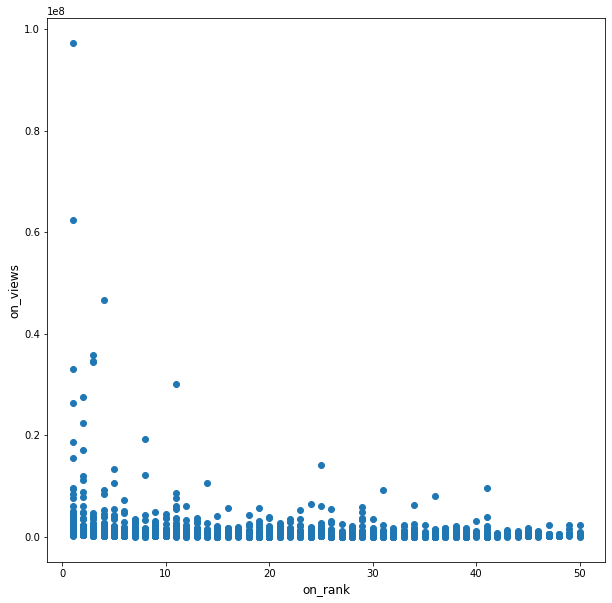

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(list(df.on_rank.values),list(df.on_views.values))
plt.xlabel('on_rank', fontsize=12)
plt.ylabel('on_views', fontsize=12)
plt.show()

* <font size=4>scatter를 통해 랭크별 조회수를 찍어본 결과 지나치게 높은 조회수를 확인</font>
* <font size=4>이를 결측치로 보고 모든 랭크에 대해서 상위 5개 조회수를 가진 열을 drop해준다.</font>

In [5]:
for idx in df.on_rank.unique():
    df = df.drop(df.sort_values(by=['on_views'], axis=0, ascending=False).on_views.head().index)

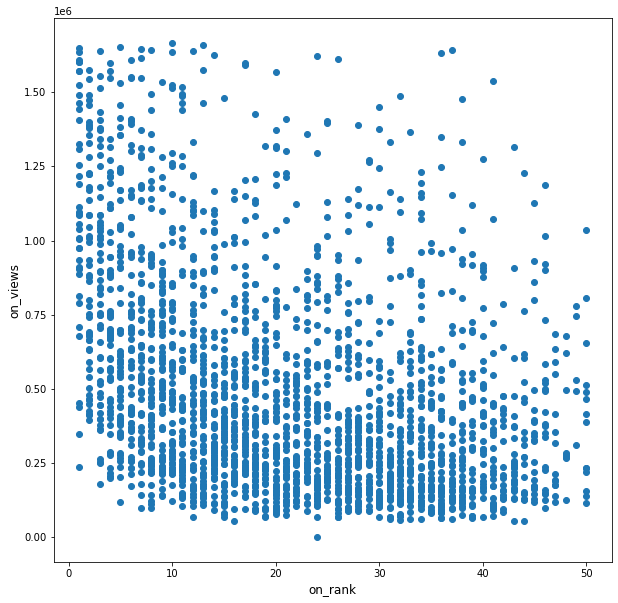

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(list(df.on_rank.values),list(df.on_views.values))
plt.xlabel('on_rank', fontsize=12)
plt.ylabel('on_views', fontsize=12)
plt.show()

In [7]:
## 조회수 0인데 인기  1 순위 결측치
print(f'조회수 결측치 총: {len(df[df.on_views == 0])} 개')
df = df[df.on_views != 0]

#좋아요, 싫어요 놓은 결측치 제거
print(f'좋아요 결측치 총: {len(df[df.on_likes == 0])} 개')
df = df[df.on_likes!=0]

## 채널 구독자 비공개 결측치 제거
print(f'구독자수 결측치 총: {len(df[df.on_channel_subscribers == 0])} 개')
df = df[df.on_channel_subscribers!=0]

## 댓글 결측치 (인기 동영상일 때는 공개하고 인기동영상 끝날때 비공개 댓글도 결측치로봄)
print(f'ON 댓글 결측치 총: {len(df[df.off_comments == 0])} 개')
print(f'OFF 댓글 결측치 총: {len(df[df.on_comments == 0])} 개')
df = df[df.off_comments!=0]
df = df[df.on_comments!=0]

print()
print(f'현재 결측치 제거 후 데이터 수: {len(df)} 개')

조회수 결측치 총: 1 개
좋아요 결측치 총: 19 개
구독자수 결측치 총: 55 개
ON 댓글 결측치 총: 12 개
OFF 댓글 결측치 총: 12 개

현재 결측치 제거 후 데이터 수: 2306 개


* <font size=4>총 100개 결측치 제거, 현재 2306개 row데이터</font>


In [8]:
df.describe()

,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2306.000000,2306.000000,2.306000e+03,2.306000e+03,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2.306000e+03,2.306000e+03,2.306000e+03,2.306000e+03,2306.000000,2306.000000
mean,21.117520,36.413270,4.962902e+05,6.834450e+05,15254.647441,17802.939722,254.169558,367.539029,1913.729402,2223.501301,1.026318e+06,1.028773e+06,5.855099e+08,5.867750e+08,8404.749350,8349.561578
std,12.616677,10.121328,3.593050e+05,5.562032e+05,30601.519079,33529.769009,841.139759,1462.241661,3420.337616,4383.378491,1.979598e+06,1.979631e+06,1.599055e+09,1.600373e+09,37758.103886,37675.104394
min,1.000000,2.000000,5.329700e+04,5.329700e+04,423.000000,423.000000,5.000000,8.000000,1.000000,1.000000,4.990000e+02,4.990000e+02,6.384500e+04,6.384500e+04,1.000000,1.000000
25%,10.000000,29.000000,2.251420e+05,2.849465e+05,4053.750000,4746.250000,83.000000,105.000000,485.000000,557.000000,1.490000e+05,1.512500e+05,3.494863e+07,3.535396e+07,116.000000,117.000000
50%,20.000000,38.000000,3.918345e+05,5.094480e+05,7129.000000,8549.500000,146.000000,193.000000,1004.500000,1158.000000,4.435000e+05,4.475000e+05,1.082204e+08,1.085135e+08,301.000000,301.500000
75%,31.000000,45.000000,6.686080e+05,9.189242e+05,13385.750000,16248.750000,257.750000,348.750000,2106.500000,2438.750000,1.110000e+06,1.110000e+06,3.889948e+08,3.900747e+08,1116.500000,1118.000000
max,50.000000,50.000000,1.666627e+06,3.914168e+06,380887.000000,458318.000000,26335.000000,46884.000000,79520.000000,134274.000000,3.780000e+07,3.780000e+07,2.146089e+10,2.146089e+10,539888.000000,540077.000000


In [9]:
print('인기동영상이 되기 위해서는')
print(f'평균 {df.on_views.mean().round()} views 필요하다.')
print(f'최소: {df.on_views.min().round()} views 가 필요하다')

인기동영상이 되기 위해서는
평균 496290.0 views 필요하다.
최소: 53297 views 가 필요하다


In [10]:
print(df.published_date.min(), df.published_date.max())
print(df.on_trending_date.min(), df.on_trending_date.max())
print(df.off_trending_date.min(), df.off_trending_date.max())

2021-03-26 2021-07-29
2021-03-28 2021-07-31
2021-04-01 2021-07-31


* <font size=4>published_date 기간은 3월 25일부터 7월29일로 구성되어 있습니다.</font>
* <font size=4>on_trending_date 기간은 3월 28일부터 7월 31일로 구성되어 있습니다.</font>
* <font size=4>off_trending_date 기간은 4월 1일부터 7월 31일로 구성되어 있습니다.</font>

# 1. 전체기간 카테고리별 동영상 개수 비교

In [11]:
print(f'{df.category_name.unique()} \n\n 카테고리 개수: {len(df.category_name.unique())}')

['Entertainment' 'Sports' 'Music' 'People & Blogs' 'Science & Technology'
 'Education' 'Howto & Style' 'News & Politics' 'Gaming' 'Comedy'
 'Pets & Animals' 'Travel & Events' 'Film & Animation' 'Autos & Vehicles'
 'Nonprofits & Activism'] 

 카테고리 개수: 15


In [12]:
category_df = df.category_name.value_counts().head()

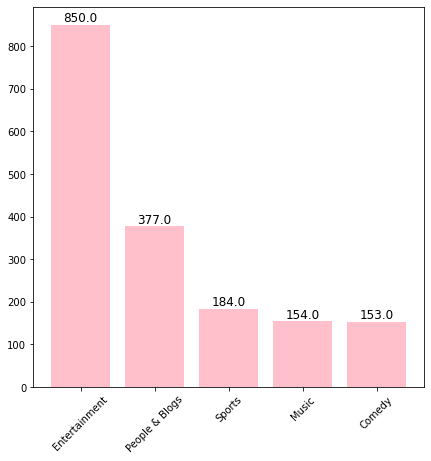

In [13]:
plt.figure(figsize=(7, 7))
x=list(category_df.index) 
y=list(category_df.values)
bars = plt.bar(x,y, color='pink')
plt.xticks(rotation=45)
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()

* <font size=4>상위 카테고리 5개 중 enterainment가 압도적인 동영상 개수를 보임</font>

# 2. 월별 카테고리별 동영상 개수

In [14]:
df[['published_date','on_trending_date']] = df[['published_date','on_trending_date']].apply(pd.to_datetime) #if conversion required
df[['on_trending_date','off_trending_date']] = df[['on_trending_date','off_trending_date']].apply(pd.to_datetime) #if conversion required

In [15]:
march_df = df[df['on_trending_date'].dt.month==3] #3월 
april_df = df[df['on_trending_date'].dt.month==4] #4월
may_df = df[df['on_trending_date'].dt.month==5] #5월
june_df = df[df['on_trending_date'].dt.month==6] #6월
july_df = df[df['on_trending_date'].dt.month==7] #7월

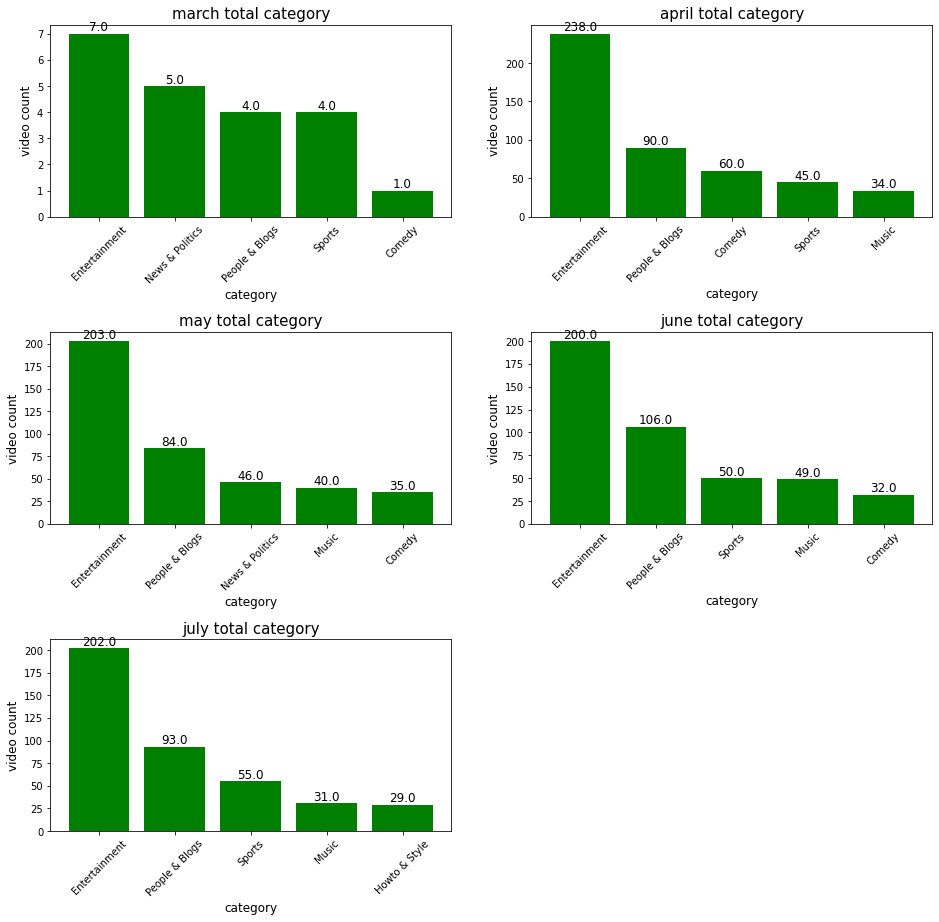

In [16]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=1, top=0.9, wspace=0.2, hspace=0.6)

# 3월 카테고리
plt.subplot(321)

month_count = march_df['video_id'].groupby(df['category_name']).agg({'count'}).sort_values(by='count',ascending=False).head(5)

x= list(month_count.index)
y= list(month_count.values[::,0])
plt.xticks(rotation=45)
plt.title('march total category', fontsize=15)
plt.xlabel('category', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
# 4월 카테고리
plt.subplot(322)
month_count = april_df['video_id'].groupby(df['category_name']).agg({'count'}).sort_values(by='count',ascending=False).head(5)


x= list(month_count.index)
y= list(month_count.values[::,0])
plt.xticks(rotation=45)
plt.title('april total category', fontsize=15)
plt.xlabel('category', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
# 5월 카테고리
plt.subplot(323)     
month_count = may_df['video_id'].groupby(df['category_name']).agg({'count'}).sort_values(by='count',ascending=False).head(5)


x= list(month_count.index)
y= list(month_count.values[::,0])

plt.xticks(rotation=45)
plt.title('may total category', fontsize=15)
plt.xlabel('category', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

# 6월 카테고리
plt.subplot(324)
month_count = june_df['video_id'].groupby(df['category_name']).agg({'count'}).sort_values(by='count',ascending=False).head(5)


x= list(month_count.index)
y= list(month_count.values[::,0])

plt.xticks(rotation=45)
plt.title('june total category', fontsize=15)
plt.xlabel('category', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
# 7월 카테고리
plt.subplot(325)
month_count = july_df['video_id'].groupby(df['category_name']).agg({'count'}).sort_values(by='count',ascending=False).head(5)

x= list(month_count.index)
y= list(month_count.values[::,0])

plt.xticks(rotation=45)
plt.title('july total category', fontsize=15)
plt.xlabel('category', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


plt.show()

# 2. 월별 채널별 동영상 개수

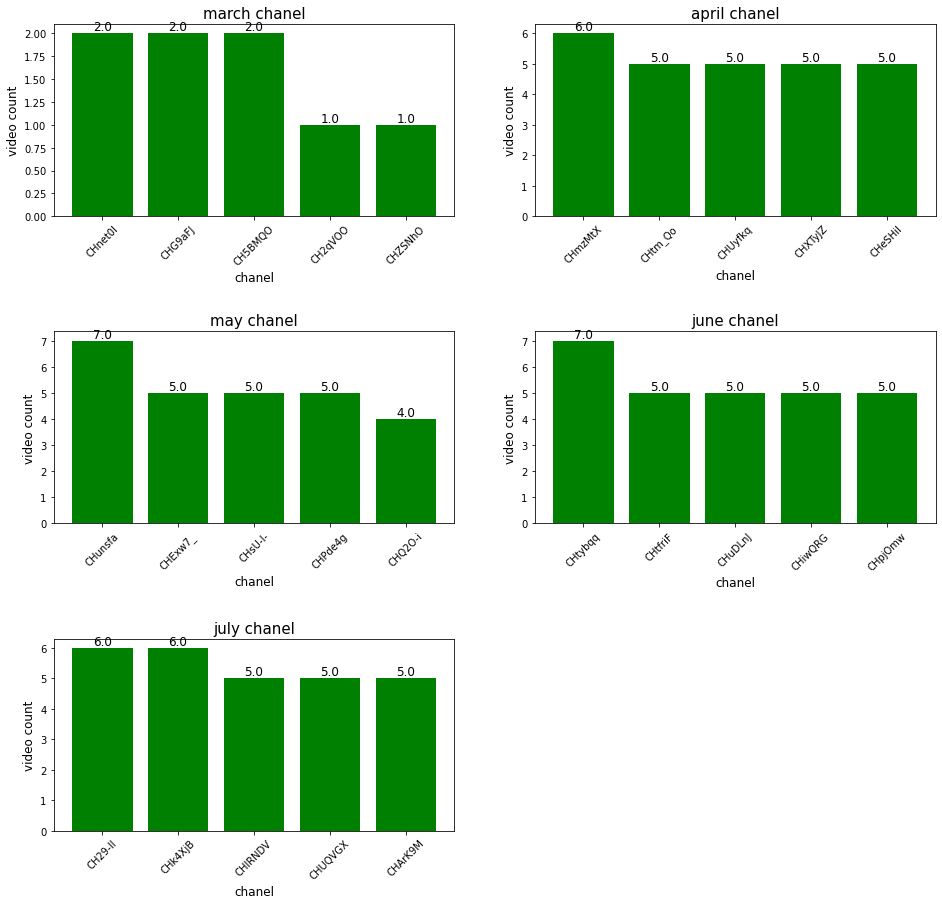

In [17]:
plt.figure(figsize=(14,14))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=1, top=0.9, wspace=0.2, hspace=0.6)

# 3월 카테고리
plt.subplot(321)

month_count = march_df['video_id'].groupby(march_df['channel_id']).agg({'count'}).sort_values(by='count',ascending=False).head(5)

x= list(month_count.index)
y= list(month_count.values[::,0])
plt.xticks(rotation=45)
plt.title('march chanel', fontsize=15)
plt.xlabel('chanel', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
# 4월 카테고리
plt.subplot(322)
month_count = april_df['video_id'].groupby(april_df['channel_id']).agg({'count'}).sort_values(by='count',ascending=False).head(5)


x= list(month_count.index)
y= list(month_count.values[::,0])
plt.xticks(rotation=45)
plt.title('april chanel', fontsize=15)
plt.xlabel('chanel', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
# 5월 카테고리
plt.subplot(323)     
month_count = may_df['video_id'].groupby(may_df['channel_id']).agg({'count'}).sort_values(by='count',ascending=False).head(5)


x= list(month_count.index)
y= list(month_count.values[::,0])

plt.xticks(rotation=45)
plt.title('may chanel', fontsize=15)
plt.xlabel('chanel', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

# 6월 카테고리
plt.subplot(324)
month_count = june_df['video_id'].groupby(june_df['channel_id']).agg({'count'}).sort_values(by='count',ascending=False).head(5)


x= list(month_count.index)
y= list(month_count.values[::,0])

plt.xticks(rotation=45)
plt.title('june chanel', fontsize=15)
plt.xlabel('chanel', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
# 7월 카테고리
plt.subplot(325)
month_count = july_df['video_id'].groupby(july_df['channel_id']).agg({'count'}).sort_values(by='count',ascending=False).head(5)

x= list(month_count.index)
y= list(month_count.values[::,0])

plt.xticks(rotation=45)
plt.title('july chanel', fontsize=15)
plt.xlabel('chanel', fontsize=12)
plt.ylabel('video count', fontsize=12)
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


plt.show()

# 2. 월별 동영상 개수 비교

In [18]:
month_count = df['video_id'].groupby(df['on_trending_date'].dt.month).agg({'count'})
month_count

,count
on_trending_date,
3,24
4,613
5,540
6,579
7,550


* <font size=4>모두 2021년도 데이터이며 3월달을 제외한 모든 데이터가 비교적 균등하게 있습니다.</font>
* <font size=4>3월 24개, 4월 613개, 5월 540개,6월 579개 7월 550개</font>

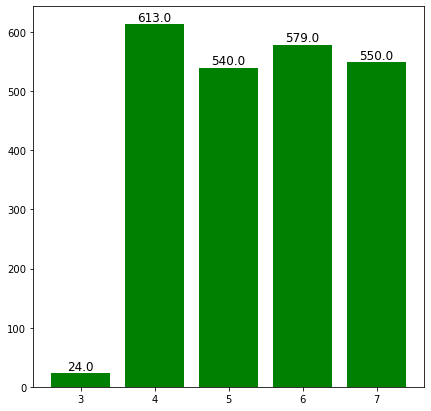

In [19]:
x= list(month_count.index)
y= list(month_count.values[::,0])
plt.figure(figsize=(7, 7))
bars = plt.bar(x,y,color='green')
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()

* <font size=4>3월을 제외한 4~7월까지 동영상 개수는 600개 가량으로 일정</font>

# 3. 월별 채널 TOP 10

In [20]:
march_df = df[df['on_trending_date'].dt.month==3] #3월 
april_df = df[df['on_trending_date'].dt.month==4] #4월
may_df = df[df['on_trending_date'].dt.month==5] #5월
june_df = df[df['on_trending_date'].dt.month==6] #6월
july_df = df[df['on_trending_date'].dt.month==7] #7월

In [21]:
print(f'중복 제거 채널 총 개수: {len(df.channel_id.value_counts())} \n\n중복제거 top5 채널: \n{df.channel_id.value_counts().head()}')

중복 제거 채널 총 개수: 858 

중복제거 top5 채널: 
CHmzMtX    14
CHlzB2i    14
CHszFjh    13
CHtfriF    13
CHtm_Qo    12
Name: channel_id, dtype: int64


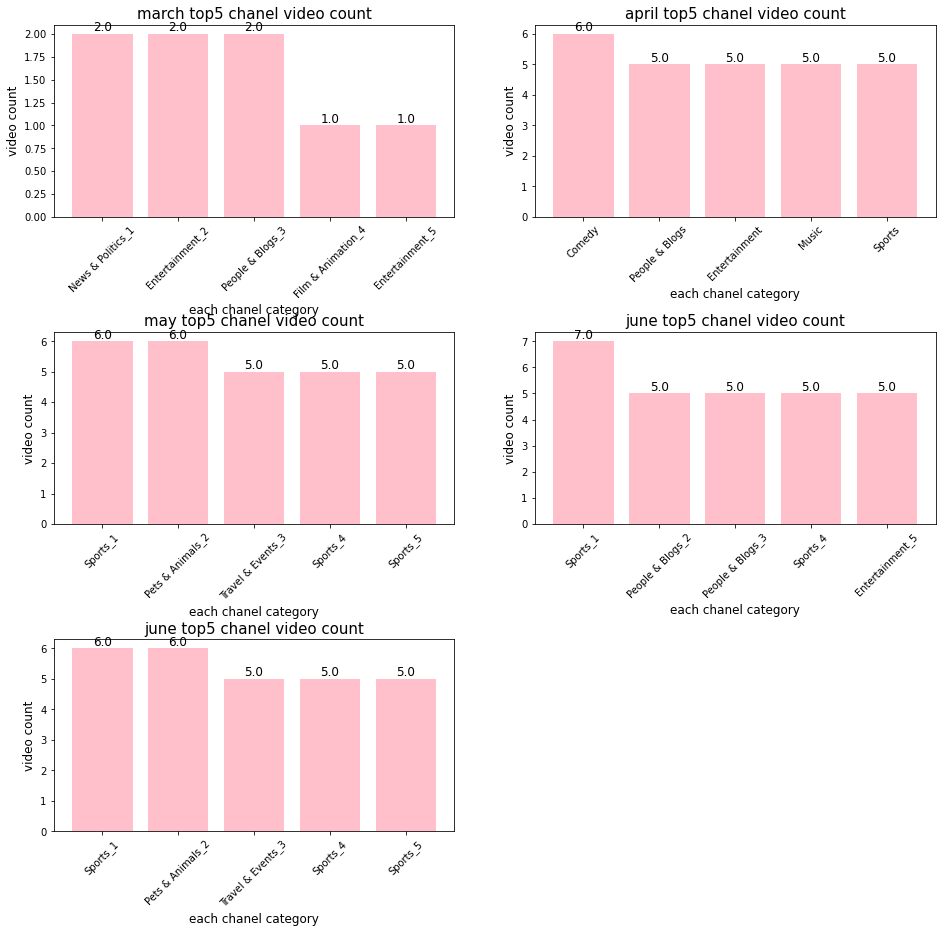

In [22]:
# 3월 채널 top5 카테고리
plt.figure(figsize=(14,14))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=1, top=0.9, wspace=0.2, hspace=0.6)

plt.subplot(321)


y= list(march_df.channel_id.value_counts().head().values)
x= []
for i,d in enumerate(march_df.channel_id.value_counts().head(5).index):
    x.append(march_df[march_df.channel_id==d].category_name.head(1).values[0]+f'_{i+1}')

bars = plt.bar(x,y, color='pink')
plt.xticks(rotation=45)
plt.title('march top5 chanel video count', fontsize=15)
plt.xlabel('each chanel category', fontsize=12)
plt.ylabel('video count', fontsize=12)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

# 4월 채널 top5 카테고리
plt.subplot(322)

y= list(april_df.channel_id.value_counts().head().values)
x= []
for i in april_df.channel_id.value_counts().head(5).index:
    x.append(april_df[april_df.channel_id==i].category_name.head(1).values[0])

bars = plt.bar(x,y, color='pink')
plt.xticks(rotation=45)
plt.title('april top5 chanel video count', fontsize=15)
plt.xlabel('each chanel category', fontsize=12)
plt.ylabel('video count', fontsize=12)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

# 5월 채널 top5 카테고리
plt.subplot(323)

y= list(july_df.channel_id.value_counts().head().values)
x= []
for i,d in enumerate(july_df.channel_id.value_counts().head(5).index):
    x.append(july_df[july_df.channel_id==d].category_name.head(1).values[0]+f'_{i+1}')

bars = plt.bar(x,y, color='pink')
plt.xticks(rotation=45)
plt.title('may top5 chanel video count', fontsize=15)
plt.xlabel('each chanel category', fontsize=12)
plt.ylabel('video count', fontsize=12)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

# 6월 채널 top5 카테고리
plt.subplot(324)

y= list(june_df.channel_id.value_counts().head().values)
x= []
for i,d in enumerate(june_df.channel_id.value_counts().head(5).index):
    x.append(june_df[june_df.channel_id==d].category_name.head(1).values[0]+f'_{i+1}')

bars = plt.bar(x,y, color='pink')
plt.xticks(rotation=45)
plt.title('june top5 chanel video count', fontsize=15)
plt.xlabel('each chanel category', fontsize=12)
plt.ylabel('video count', fontsize=12)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    

# 7월 채널 top5 카테고리
plt.subplot(325)

y= list(july_df.channel_id.value_counts().head().values)
x= []
for i,d in enumerate(july_df.channel_id.value_counts().head(5).index):
    x.append(july_df[july_df.channel_id==d].category_name.head(1).values[0]+f'_{i+1}')

bars = plt.bar(x,y, color='pink')
plt.xticks(rotation=45)
plt.title('june top5 chanel video count', fontsize=15)
plt.xlabel('each chanel category', fontsize=12)
plt.ylabel('video count', fontsize=12)

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


plt.show()

* <font size=4>월별 채널 top 5 카테고리 별로 분석해 본 결과</font>
* <font size=4>3월은 entertain이 압도적으로 많은 분포를 보였으며</font>
* <font size=4>4~7월에는 sport가 많이 분포 되어있었습니다.</font>
* <font size=4>또한, 최소 2개~9개 사이에 동영상이 있었습니다.</font>
    

# 4. 주차별 top5 채널

In [23]:
df_week = df.sort_values(by='on_trending_date')

In [24]:
for week in list(df_week['on_trending_date'].dt.week.unique()):
    week_df_1 = df_week[df_week['on_trending_date'].dt.week==week] ### 주별 데이터프레임 만들기
    week_plt = week_df_1['video_id'].groupby(week_df_1['channel_id']).agg({'count'})

/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/3527894106.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  for week in list(df_week['on_trending_date'].dt.week.unique()):
/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/3527894106.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_df_1 = df_week[df_week['on_trending_date'].dt.week==week] ### 주별 데이터프레임 만들기
/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/3527894106.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_df_1 = df_week[df_week['on_trending_date'].dt.week==week] ### 주별 데이터프레임 만들기
/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/3527894106.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have be

/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/1320160626.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  for idx,week in enumerate(list(df_week['on_trending_date'].dt.week.unique())):
/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/1320160626.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_df_1 = df_week[df_week['on_trending_date'].dt.week==week] ### 주별 데이터프레임 만들기
/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/1320160626.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_df_1 = df_week[df_week['on_trending_date'].dt.week==week] ### 주별 데이터프레임 만들기
/var/folders/tb/j9qmrzv54k73r5l100jxqll80000gn/T/ipykernel_27458/1320160626.py:5: FutureWarning: Series.dt.weekofyear and Series.

<Figure size 432x288 with 0 Axes>

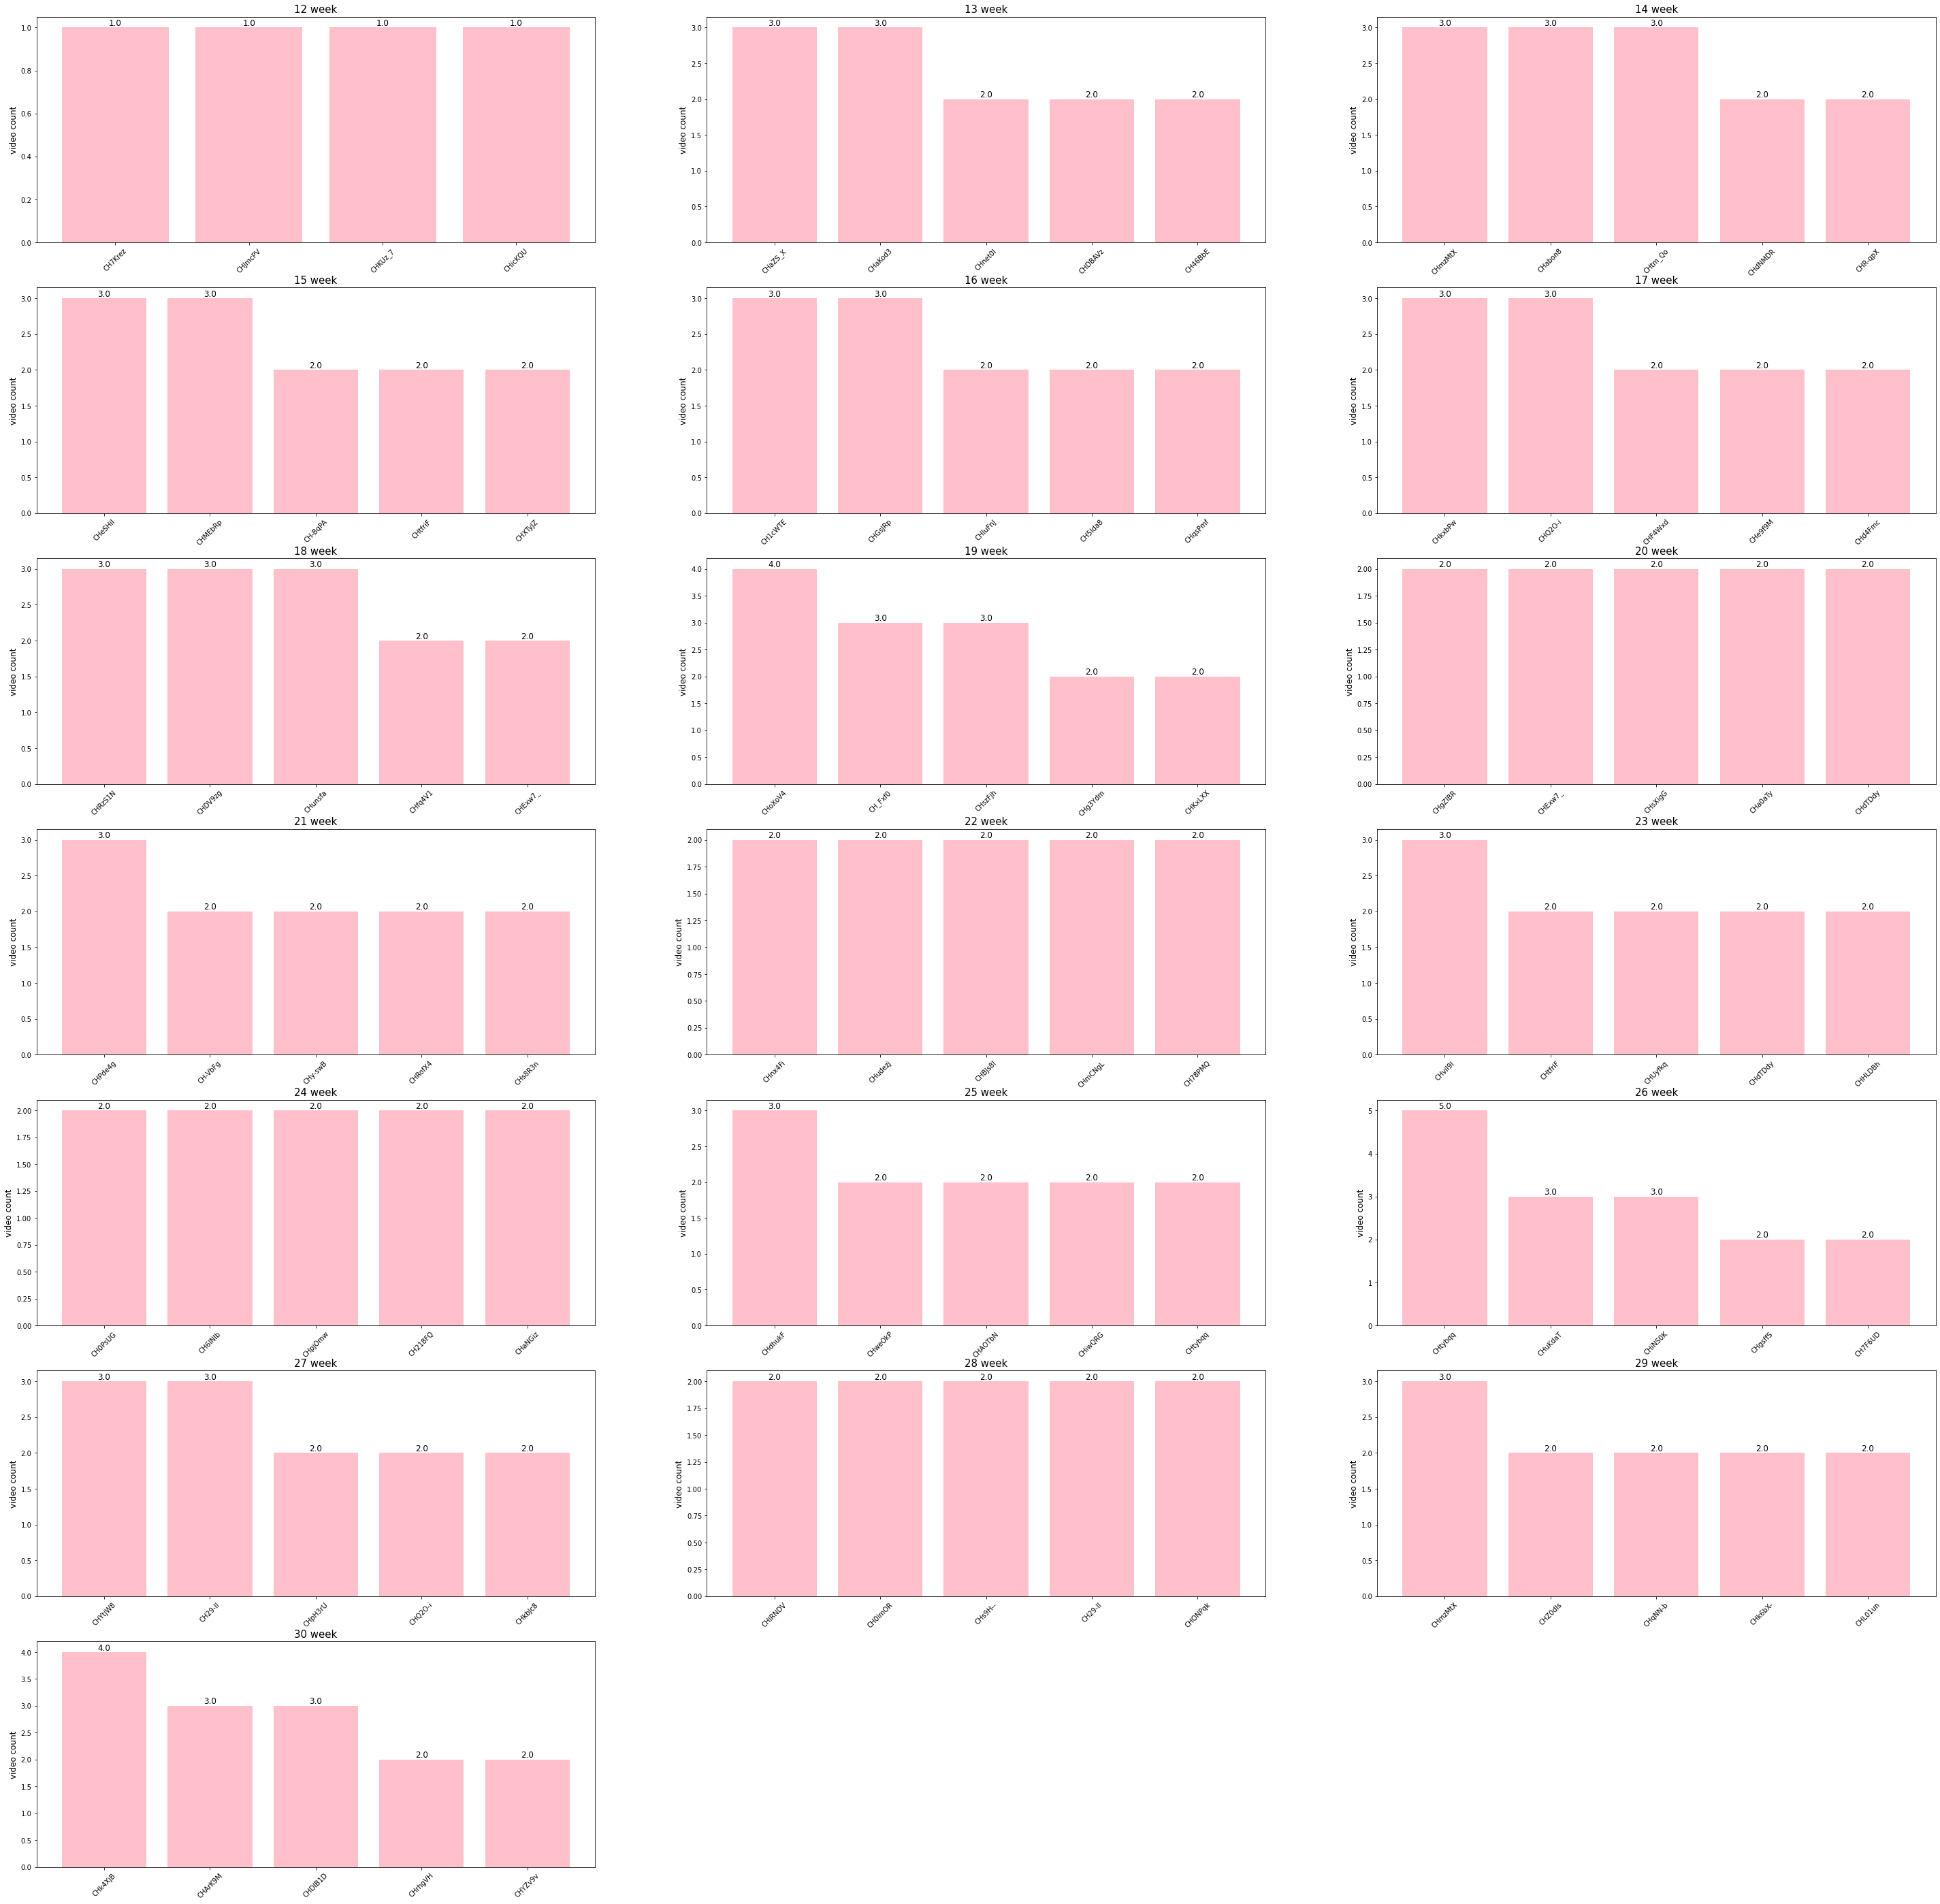

In [25]:
plt.subplots_adjust(left=0.125, bottom=0.5,  right=1, top=0.9, wspace=0.2, hspace=0.6)
plt.figure(figsize=(50,50))

for idx,week in enumerate(list(df_week['on_trending_date'].dt.week.unique())):
    week_df_1 = df_week[df_week['on_trending_date'].dt.week==week] ### 주별 데이터프레임 만들기
    week_plt = week_df_1['video_id'].groupby(week_df_1['channel_id']).agg({'count'}).sort_values(by='count',ascending=False)

    y=list(week_plt.head(5).values.reshape(-1))
    x=list(week_plt.head(5).index)

    
    

    plt.subplot(7,3,idx+1)

    bars = plt.bar(x,y, color='pink')
    plt.xticks(rotation=45)
    plt.title(f'{week} week', fontsize=15)
    plt.ylabel('video count', fontsize=12)

    for rect in bars:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
        
plt.show()        

# 5. 월별 카테고리별 태그 키워드 순위

In [26]:
df.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        325
description                  35
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [27]:
tag_df = df[df.tags.notnull()]

In [28]:
tag_df.isnull().sum()

video_id                     0
channel_id                   0
published_date               0
category_name                0
duration                     0
tags                         0
description                 22
on_trending_date             0
off_trending_date            0
on_rank                      0
off_rank                     0
on_views                     0
off_views                    0
on_likes                     0
off_likes                    0
on_dislikes                  0
off_dislikes                 0
on_comments                  0
off_comments                 0
on_channel_subscribers       0
off_channel_subscribers      0
on_channel_total_views       0
off_channel_total_views      0
on_channel_total_videos      0
off_channel_total_videos     0
dtype: int64

* <font size=4>tags null 325개 값 전처리</font>

In [29]:
march_df = tag_df[tag_df['on_trending_date'].dt.month==3] #3월 
april_df = tag_df[tag_df['on_trending_date'].dt.month==4] #4월
may_df = tag_df[tag_df['on_trending_date'].dt.month==5] #5월
june_df = tag_df[tag_df['on_trending_date'].dt.month==6] #6월
july_df = tag_df[tag_df['on_trending_date'].dt.month==7] #7월
all_month_df = ['march_df', 'april_df', 'may_df', 'june_df', 'july_df']

* <font size=4>3월부터 7월까지 태그 시각화 하기</font>

In [30]:
#count the tags 함수
def tag_count(df):
    tag_counts = {}
    for i in df.tags:
        for j in i.split('|'):
            if j not in tag_counts:
                tag_counts[j]=1
            else:
                tag_counts[j] +=1

    #sort by counts        
    sorts = {k: v for k, v in sorted(tag_counts.items(), key=lambda item: item[1],reverse=True)}
    return sorts

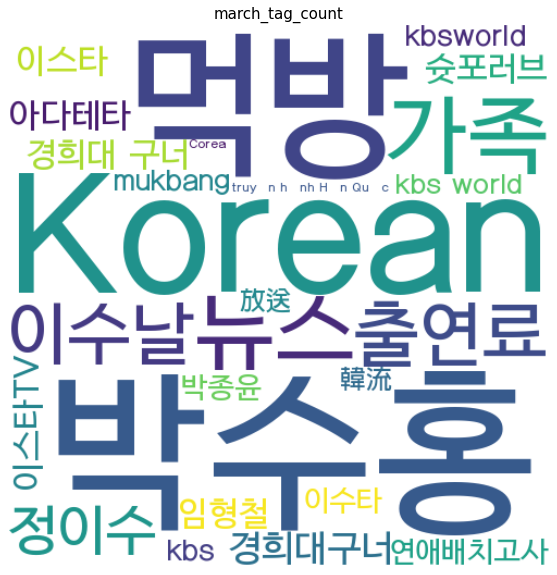

,0
박수홍,3
Korean,3
먹방,3
가족,2
뉴스,2


In [31]:
from wordcloud import WordCloud
font = '/Users/jinsuc28/Documents/GitHub/Algorithm-Practice/a뉴고딕B.ttf'
wc = WordCloud(
    max_words=30,
    font_path=font,
    min_font_size=1,
    background_color='white',
    width=500,
    height=500)


sorts = tag_count(march_df)
wc.generate_from_frequencies(sorts)
# wc.to_file('wordcloud.png')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('march_tag_count', fontsize=15)
plt.axis('off')
plt.show()

pd.DataFrame(sorts.values(), sorts.keys()).head()

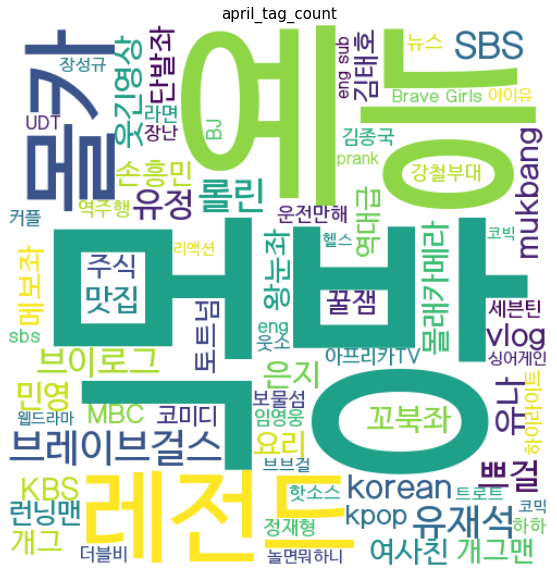

,0
먹방,34
예능,24
레전드,23
몰카,22
브레이브걸스,22


In [32]:
wc = WordCloud(
    max_words=75,
    font_path=font,
    min_font_size=1,
    background_color='white',
    width=500,
    height=500)

sorts = tag_count(april_df)
wc.generate_from_frequencies(sorts)
# wc.to_file('wordcloud.png')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('april_tag_count', fontsize=15)
plt.axis('off')
plt.show()

pd.DataFrame(sorts.values(), sorts.keys()).head()


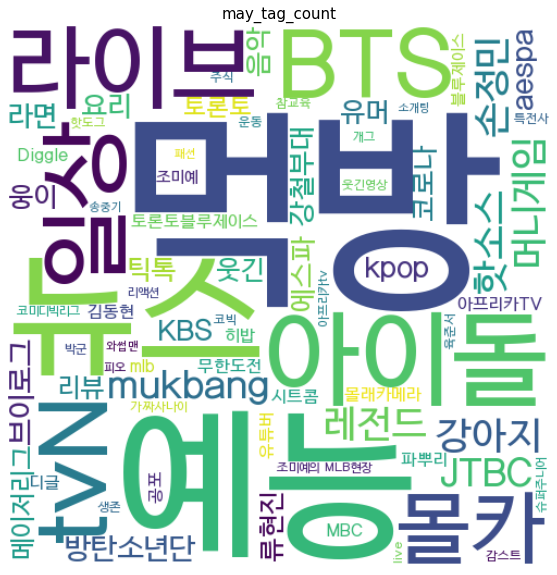

,0
먹방,38
예능,19
뉴스,19
아이돌,17
라이브,13


In [33]:
sorts = tag_count(may_df)
wc.generate_from_frequencies(sorts)
# wc.to_file('wordcloud.png')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('may_tag_count', fontsize=15)
plt.axis('off')
plt.show()

pd.DataFrame(sorts.values(), sorts.keys()).head()


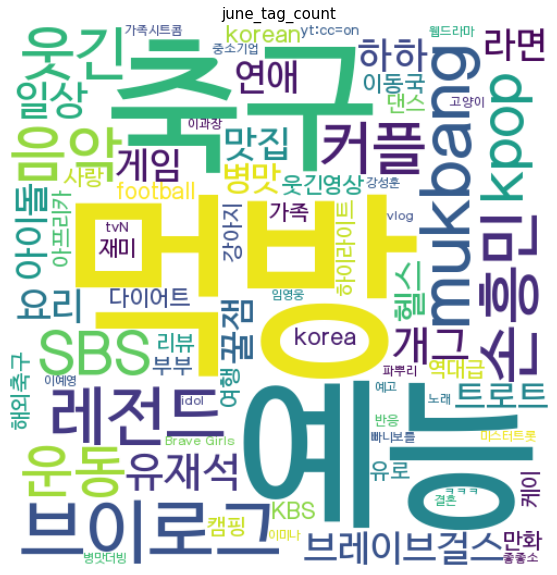

,0
먹방,45
예능,28
축구,21
브이로그,20
mukbang,18


In [34]:
sorts = tag_count(june_df)
wc.generate_from_frequencies(sorts)
# wc.to_file('wordcloud.png')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('june_tag_count', fontsize=15)
plt.axis('off')
plt.show()

pd.DataFrame(sorts.values(), sorts.keys()).head()


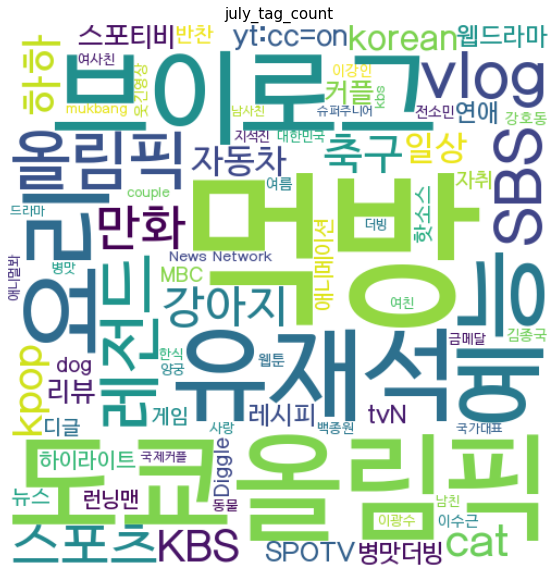

,0
먹방,28
도쿄올림픽,27
브이로그,21
유재석,20
요리,18


In [35]:
sorts = tag_count(july_df)
wc.generate_from_frequencies(sorts)
# wc.to_file('wordcloud.png')
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('july_tag_count', fontsize=15)
plt.axis('off')
plt.show()

pd.DataFrame(sorts.values(), sorts.keys()).head()


# 결론

* <font size=4>1. entertainment, people & blog 카테고리 그리고 먹방, 예능 tag 소재 동영상 인기동영상이 되기 유리하다.</font>
* <font size=4>2. 매월마다 인기동영상은 600개 정도가 올라온다.</font>
* <font size=4>3. 인기동영상이 되기위해서는 최소 약53,000view가 필요하며 평균 약496,000 조회수로 인기동영상이 된다.</font>
* <font size=4>4. 같은 채널의 동영상은 최대5번까지 인기동영상이 될 수 있다.</font>

# Q2

# 0. Engagement 구하기

* <font size=4>대표 지표들에 대한 상관관계 조사를 해보았다.</font>
* <font size=4>대표 지표는 on_trending_date, off_trending_date, on_rank on_views, on_likes,on_dislike, on_comments, on_channel_subscribers이다.</font>

<AxesSubplot:>

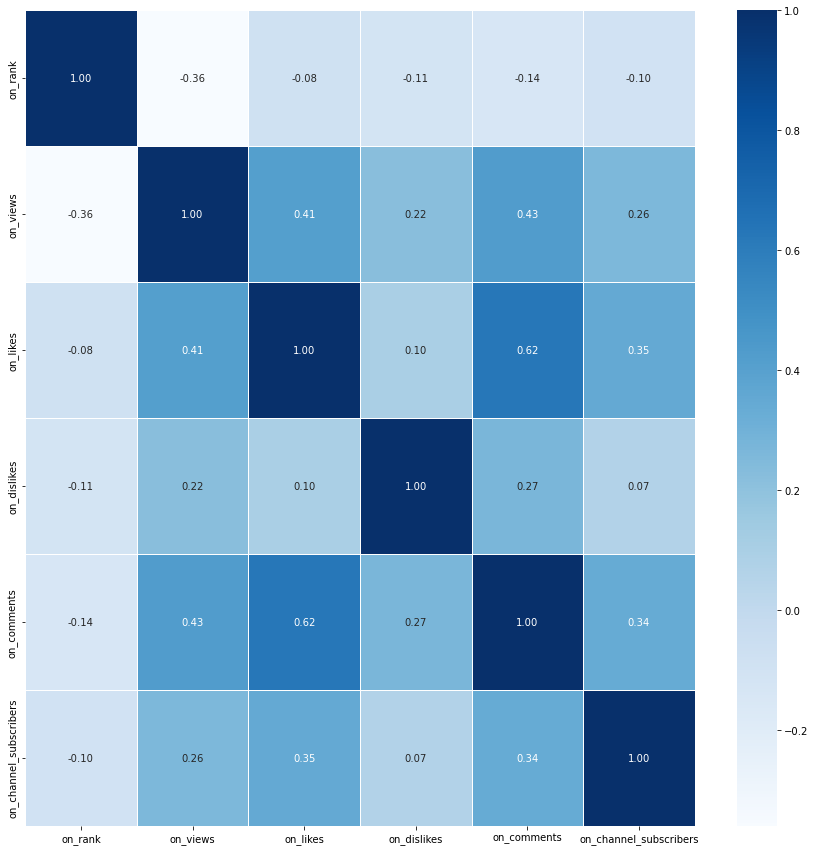

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df[['on_trending_date', 'off_trending_date', 'on_rank','on_views', 'on_likes','on_dislikes', 'on_comments', 'on_channel_subscribers']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

* <font size=4>on comment가 on likes와 0.62의 상관관계를 보이는 것으로 나타났다.</font>
* <font size=4>comment를 남기면 likes를 누르는데 연관이 있다고 볼 수 있다. </font>

* <font size=4>하지만, 가장 중요한 views와 상관관계가 높은 지표를 찾을 수 없었다.</font>

# 1. 가설 제시 및 검증

* <font size=4>engagement를 구하기 위한 가설을 생각해보았다.</font>
* <font size=4>on_view가 가장 큰 영향을 줄 것이라고 생각했으며 published_date와 on_trending_date시기와 관계를 주목해보고자 했다.</font>
* <font size=4>가설: on_views/(on_trending_date-published_date)는 rank와 상관관계가 있을 것이다. </font> 

* <font size=4>가설을 검증하기 published_on_date(on_trending_date-published_date)를 구해보고</font>
* <font size=4>engagement(on_views/(on_trending_date-published_date)와 rank의 상관관계를 구해보았다.</font>

* <font size=4>likes, dislikes, comment를 남기려면 동영상을 시청해야하기 때문에 그 수치가 view안에 내포하고 있다고 판단하여 고려하지 않았다.</font>

In [37]:
df[['published_date','on_trending_date']] = df[['published_date','on_trending_date']].apply(pd.to_datetime) #if conversion required
df['published_on_date'] = (df['on_trending_date'] - df['published_date']).dt.days

In [38]:
df.keys()

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos',
       'published_on_date'],
      dtype='object')

In [39]:
df['engagement'] = df['on_views']//df['published_on_date']

* <font size=4>engagement를 구해보았다.</font>

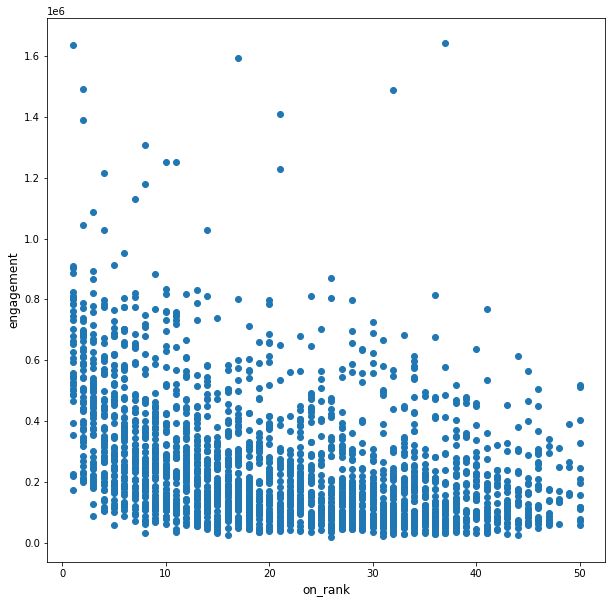

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(list(df.on_rank.values),list(df.engagement.values))
plt.xlabel('on_rank', fontsize=12)
plt.ylabel('engagement', fontsize=12)
plt.show()

<AxesSubplot:>

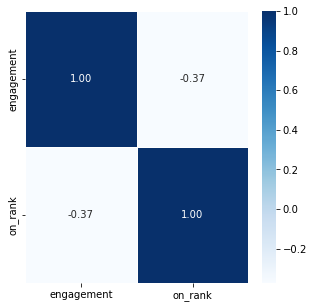

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(data = df[['engagement','on_rank']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

* <font size=4>상관관계 검증 결과 -0.37로 음의 상관관계가 나타났다.</font>

* <font size=4>해당 동영상을 같은 채널에 최근 업로드한 다른 동영상과 비교한 결과(youtube 고객센터)를 고려해보고자 한다.</font>
* <font size=4>on_channel_total_views를 고려한 engagement를 만들고자 한다.</font>

* <font size=4>기존 engagement 지표에 on_channel_total_views를 전체 데이터의 standard 지표를 곱하기로 한다.</font>
* <font size=4>engagement는 engagement * standard(on_channel_total_views) 결과 값이다</font>

In [42]:
df['standard']= (df['on_channel_total_views']-df['on_channel_total_views'].mean())/df['on_channel_total_views'].std()
df['engagement'] = df['engagement']*df['standard']

<AxesSubplot:>

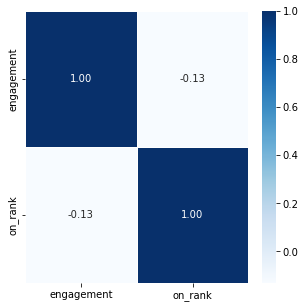

In [43]:
plt.figure(figsize=(5,5))
sns.heatmap(data = df[['engagement','on_rank']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

* <font size=4>on_channel_total_views를 engagement에 반영한 상관관계 검증결과 -0.13으로 오히려 낮아지는 결과를 보였다. </font>

# 2. 결론

* <font size=4>engagement의 가장 중요한 지표는 views이다.</font>
* <font size=4>on_channel_total_views에 대한 standard를 engagement에 반영하는 것은 좋지 않다.</font>